# Final Project (Group: Kim Lam and Sydney Ross)
Undergraduate students and Graduate students - Groups of 1-3 Allowed

Use Tensorflow or any AI-related technology and what we did in class to perform the following:

List your group name - Team Members
Create a problem statement
Retrieve a dataset or create one.
Implement algorithm
Use the dataset to make predictions
If possible, create a GUI
Name the application
Indicate if you would be interested in presenting
Required deliverables:

Link to the dataset (you do not necessarily have to upload the dataset itself)
Source code
Output
Screenshots
1-3 Paragraph Explanation

In [ ]:
!pip install tensorflow

In [ ]:
!pip install Pillow

**Problem Statement:** With the state of the world today, online communciations and postings are becoming increasingly popular. With that being said, it is important to be able to recognize the sentiment of virtual text. The biggest inticator of mood and text tone is emojis. However, are the emoji sentiments consistent? We want to find correlations and groupings of emojis to better group the emojis into sentiment groupings. 

Research Sources:
- DATASET: https://www.kaggle.com/datasets/subinium/emojiimage-dataset?select=full_emoji.csv
- Another emoji dataset: https://github.com/iamcal/emoji-data
- K-means clustering with emojis: https://www.sidework.ai/blog/2020/09/24/emoji-clusters-kmeans
- K-means: https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/
- Image recognition with numbers: https://medium.com/@joel_34096/k-means-clustering-for-image-classification-a648f28bdc47

*   Stack Overflow
*   https://www.tensorflow.org/tutorials/keras/classification

**Explanation:**

This assignment was really interesting. We wanted to utilize tensorflow but apply it to image classification, so we used the Keras model in the tensorflow library. Here we played around with different categories of emotions that emojis typically represent. Since we had such a small working dataset, we had to cut back on some specific categories. Overall we used the main 8 sentiments: Happy, Sarcasam, Neutral, Surprise, Anger, Disgust, Sad, and Fear. In a further development of this concept we could potentially add curious, flirty, tired/relaced, and proud. We think that these other categories might make the sentiments more accurate to real life, however since the dataset is so small (once cleaned), we thought this would cloud the AI's ability to learn. 

We also played around with different densities for our model and running through various numbers of epoch to find the most accurate model. Overall, we averaged about 43%-50% accurate. Obviously this is pretty low, however we believe this is due to the size of usable data. Even though our original dataset was about 2,000 rows, not all of the emojis are used for sentiments. For example, there is a whole section of just occupation related emoticons. These are all kind of neutral or depend on the context, so we found them hard to label (hand categorize). If we had a bigger dataset of simple emotion based emoticons, or even applied this idea to images of real people's faces (or something), we think we would have a higher accuracy. The model just runs out of data for it to be trained with the precision and accuracy that we had hoped for. 

Some other interesting findings were the two other modifications to the code:

1. This version used a smaller Emoji dataset of ~180 emojis to narrow down the emojis that were mostly faces and hand signals. The accuracy of this model was about ~43%, which is only a slight improvement compared to this version. Here is the Google Colab link for v4.1: https://colab.research.google.com/drive/1ZIUMWtc5smy3ySh5PtuX1UJIkJbp8z8n?usp=sharing

2. This version used a bigger Emoji dataset of ~650 emojis so that we would have a larger training set. This model was one of our more consistant models with an accuracy of ~45%, which is also only a slight improvement. We think that if we had a even bigger dataset, our model would've been more accurate. However, there are only so many emojis that are accurate representations of sentiment. Here is the Google Colab link for v5: https://colab.research.google.com/drive/1hy2706AR2Xy2ti4w538spBSFzA5XvDdN?usp=sharing




#Application Name: Emoji Sentiment Analyzer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pydotplus #pip install pydotplus
import graphviz 

import tensorflow as tf
import keras

from PIL import Image
import io
import os
import glob
import base64
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#For Google Sheets
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
#Import directly from Google Sheets
worksheet = gc.open('full_emoji').sheet1

# get_all_values gives a list of rows
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render
data = pd.DataFrame.from_records(rows)
data

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,#,emoji,unicode,name,Apple,Google,Facebook,Windows,Twitter,JoyPixels,Samsung,Gmail,SoftBank,DoCoMo,KDDI,Labels
1,1,😀,U+1F600,grinning face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAPAKIFAJh3AP/z...",,,,Happy
2,2,😃,U+1F603,grinning face with big eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIFAF5LAP/z...","data:image/png;base64,R0lGODlhDwAPAKIAAP///wAA...","data:image/png;base64,R0lGODlhDAAMAIABAMxm////...","data:image/png;base64,R0lGODlhDgAPALMJAP//mf/M...",Happy
3,3,😄,U+1F604,grinning face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAF5LAJh3...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...",,,Happy
4,4,😁,U+1F601,beaming face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAIoAAf/v...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...","data:image/png;base64,R0lGODlhDAAMAIABAP+ZAP//...","data:image/png;base64,R0lGODlhDgAPALMIAJmZmf//...",Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,1812,🇿🇲,U+1F1FF U+1F1F2,flag: Zambia,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",,,,,
1812,1813,🇿🇼,U+1F1FF U+1F1FC,flag: Zimbabwe,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",,,,,
1813,1814,🏴󠁧󠁢󠁥󠁮󠁧󠁿,U+1F3F4 U+E0067 U+E0062 U+E0065 U+E006E U+E006...,flag: England,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",,,,,
1814,1815,🏴󠁧󠁢󠁳󠁣󠁴󠁿,U+1F3F4 U+E0067 U+E0062 U+E0073 U+E0063 U+E007...,flag: Scotland,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",,,,,


In [ ]:
#Data clean up
data = data.drop([0], axis = 1)
data = data.drop([2], axis = 1)
data = data.drop([3], axis = 1) #Description of each emoji
#data = data.drop([4], axis = 1) #Keeping the Apple emoji base64 encoding
data = data.drop([5], axis = 1)
data = data.drop([6], axis = 1)
data = data.drop([7], axis = 1)
data = data.drop([8], axis = 1)
data = data.drop([9], axis = 1)
data = data.drop([10], axis = 1)
data = data.drop([11], axis = 1)
data = data.drop([12], axis = 1)
data = data.drop([13], axis = 1)
data = data.drop([14], axis = 1)

In [ ]:
data

,1,4,15
0,emoji,Apple,Labels
1,😀,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Happy
2,😃,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Happy
3,😄,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Happy
4,😁,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Happy
...,...,...,...
1811,🇿🇲,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",
1812,🇿🇼,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",
1813,🏴󠁧󠁢󠁥󠁮󠁧󠁿,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",
1814,🏴󠁧󠁢󠁳󠁣󠁴󠁿,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",


In [ ]:
#ACTUALLY DONT NEED THIS. LOADING EACH EMOJI IMAGE BY BASE64 DECODING
#Drop rows that are not good (emojis that don't show up or non-face/emotional ones)

#These are emojis that do not show up (most of them are newer emojis added in the last few years)
#data.drop([22,64,91,133,163,164,192,193,197,200,201,254,255,256,323,385,386, \
#           387,388,389,390,391,392,393,394,395,396,397,398,399,504,513,516, \
#           517,534,551,561,568,569,570,587,588,589,604,616,619,624,625,638, \
#           664,667,675,679,680,687,691,704,706,711,715,739,757,769,770,771, \
#           772,799,800,801,824,869,876,877,878,882,905,963,1043,1049,1050, \
#           1053,1061,1062,1075,1077,1082,1092,1093,1094,1095,1103,1110,1117, \
#           1142,1147,1149,1184,1203,1262,1269,1272,1274,1279,1282,1285,1294, \
#           1296,1297,1299,1300,1301,1304,1306,1309,1310,1316,1318,1324,1327], axis=0)

In [ ]:
#The following are ranges that have missing values and are also non-sentiment emojis
#135-142 are different colored hearts
#data.drop([data.index[135:142]], axis=0)
#for x in range(135,143):
  #data = data.drop([x], axis=0)

#1514-1547 are different colored shapes
#data.drop([data.index[1514:1547]])
#for x in range(1514,1548):
  #data = data.drop([x], axis=0)

#1548-1555 are other flags
#data.drop([data.index[1548:1555]])
#for x in range(1548,1556):
  #data = data.drop([x], axis=0)

#1556-1816 are country flags
#data.drop([data.index[1556:1816]])
#for x in range(1556,1817):
  #data = data.drop([x], axis=0)

In [ ]:
#Delete non-sentiment emojis
for x in range(265,1816):
  data = data.drop([x], axis=0)

In [ ]:
print(type(data[1]))
data

<class 'pandas.core.series.Series'>


,1,4,15
0,emoji,Apple,Labels
1,😀,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Happy
2,😃,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Happy
3,😄,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Happy
4,😁,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Happy
...,...,...,...
260,🤦,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Disgust
261,🤦‍♂️,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Disgust
262,🤦‍♀️,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Disgust
263,🤷,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Anger


In [ ]:
#data[1] = data[1].astype(object).astype(float)

In [ ]:
dataLen = len(data)
dataLen

265

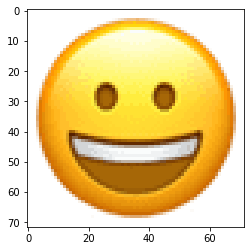

In [ ]:
base64_decoded = base64.b64decode(data[4][1].split(',')[-1])
image = Image.open(io.BytesIO(base64_decoded)).convert('RGBA')

plt.imshow(image)

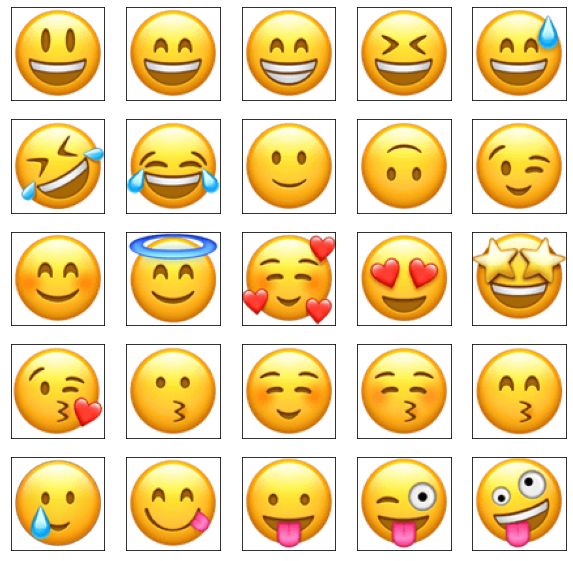

In [ ]:
plt.figure(figsize=(10,10))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    base64_decoded = base64.b64decode(data[4][i+1].split(',')[-1])
    image = Image.open(io.BytesIO(base64_decoded)).convert('RGBA')
    plt.imshow(image)

In [ ]:
emojiSet = []

for x in range(0,dataLen-1):
  base64_decoded = base64.b64decode(data[4][x+1].split(',')[-1])
  image = Image.open(io.BytesIO(base64_decoded)).convert('RGBA')
  emojiSet.append(image)

emojiSet
#print(len(emojiSet))

[<PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3D271190>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CDE3210>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3D2712D0>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CDE3B90>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CCDB810>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CDE3690>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3D386C10>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CCBE6D0>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CC64290>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CCDB250>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3D386D90>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CCDB990>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CCE32D0>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CCE30D0>,
 <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CCE3450>,
 <PIL.Image.Image image m

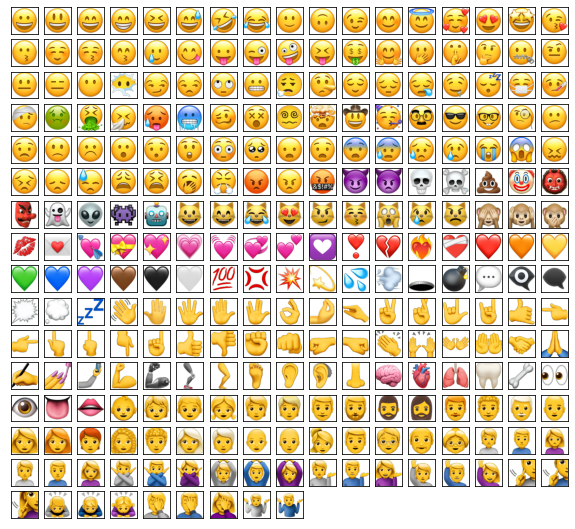

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(emojiSet)):
  plt.subplot(17,17,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(emojiSet[i])

In [ ]:
type(emojiSet)
print(len(emojiSet))

264


In [ ]:
#Categories for sentiment
#joy,sadness,anger,neutral,fear,shock,sarcasam,flirty,curious,embarrassment

#USED THESE ONES
classNames = ['Happy', 'Sarcasam', 'Neutral', 'Surprise', 'Anger', 'Disgust', 'Sad', 'Fear']

In [ ]:
data.fillna("Neutral") #fill nulls with a value
data = data.replace('', "Neutral")

In [ ]:
data.loc[200]

1                                                     🫀
4     data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...
15                                              Neutral
Name: 200, dtype: object

In [ ]:
#Drop first row (headers)
data = data.drop([0], axis=0)

In [ ]:
print("Distribution of data: ")
print(data[15].value_counts(dropna=False))
    
labels, uniques = pd.factorize(data[15])

print(labels)
print(len(labels))
print(uniques)

data = data.drop([15], axis=1) 
data.insert(0, column = 15, value = labels)

Distribution of data: 
Happy       76
Neutral     65
Sarcasam    28
Anger       26
Sad         24
Surprise    19
Fear        15
Disgust     11
Name: 15, dtype: int64
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 3 2 4 4 4
 4 0 5 5 1 2 5 0 6 6 0 1 3 3 3 7 7 6 7 7 3 2 2 2 0 0 2 0 1 2 2 6 6 6 2 2 2
 2 6 6 6 3 3 6 6 6 3 6 6 6 6 6 6 1 5 5 5 5 0 5 5 5 7 1 2 5 1 4 4 4 0 0 0 0
 0 0 2 6 6 3 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 3 1 3
 3 5 4 2 4 4 4 6 0 4 4 4 1 4 4 4 0 3 0 5 0 4 4 4 5 4 4 0 7 4 5 4 4 0 0 4 2
 4 3 4 1 1 1 0 0 1 4 2 0 7 1 4 4 4 5 1 1 7 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 1 1 1 5 5 5 6 6 6 5 5 5 4 4 4 1 1 1 4 4 4 4 4 4 1 1 1
 7 7 7 5 5]
264
Index(['Happy', 'Sarcasam', 'Surprise', 'Fear', 'Neutral', 'Anger', 'Sad',
       'Disgust'],
      dtype='object')


In [ ]:
#Drop Apple base64 encoding
data = data.drop([4], axis = 1) #Keeping the Apple emoji base64 encoding

In [ ]:
data

,15,1
1,0,😀
2,0,😃
3,0,😄
4,0,😁
5,0,😆
...,...,...
260,7,🤦
261,7,🤦‍♂️
262,7,🤦‍♀️
263,5,🤷


In [ ]:
#Data split
X = data[1]
print(X)
y = data[15]
print(y)

1         😀
2         😃
3         😄
4         😁
5         😆
       ... 
260       🤦
261    🤦‍♂️
262    🤦‍♀️
263       🤷
264    🤷‍♂️
Name: 1, Length: 264, dtype: object
1      0
2      0
3      0
4      0
5      0
      ..
260    7
261    7
262    7
263    5
264    5
Name: 15, Length: 264, dtype: int64


In [ ]:
X = emojiSet
print(X)
print(len(X))

[<PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3D271190>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CDE3210>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3D2712D0>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CDE3B90>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CCDB810>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CDE3690>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3D386C10>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CCBE6D0>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CC64290>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CCDB250>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3D386D90>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CCDB990>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CCE32D0>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CCE30D0>, <PIL.Image.Image image mode=RGBA size=72x72 at 0x7FEE3CCE3450>, <PIL.Image.Image image mode=RGBA size=7

In [ ]:
#Test/Train Split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y,random_state=1)

print(len(x_train))
print(type(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

211
<class 'list'>
53
211
53


TensorFlow Image Classification

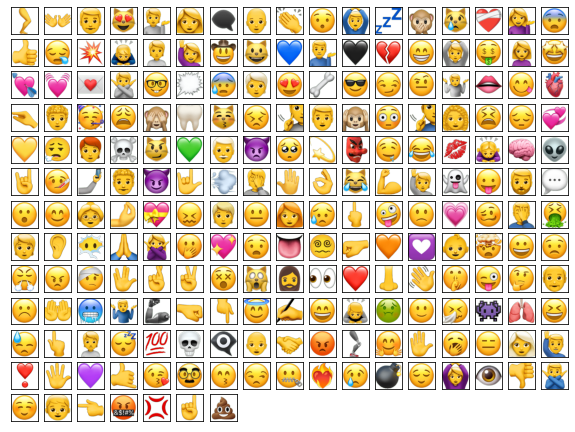

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(x_train)):
  plt.subplot(17,17,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])

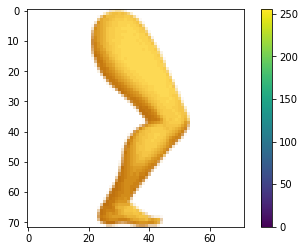

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Build model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(72, 72, 4)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              #loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
y_test = np.array(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
#from keras import backend as K
for i in range (len(x_train)):
  img = x_train[i]
  img = np.asarray(img)
  x_train[i] = img

for i in range(len(x_test)):
  img = x_test[i]
  img = np.asarray(img)
  x_test[i] = img
#doesn't work.
#x_train1 = K.cast_to_floatx(x_train)
#y_train1 = K.cast_to_floatx(y_train)

In [ ]:
x_train = np.array([np.array(val) for val in x_train])
x_test = np.array([np.array(val) for val in x_test])

In [ ]:
print("----shape of x_train-----")
print(x_train.shape)
print("----shape of each x_train element-----")
print(x_train[1].shape)
print("----shape of x_test-----")
print(x_test.shape)
print("----shape of each x_test element-----")
print(x_test[1].shape)
print("----shape of y_train-----")
print(y_train.shape)
print("----shape of y_train elements-----")
print(y_train[1].shape)
print("-----shape of y_test-----")
print(y_test.shape)
print("----shape of y_test elements-----")
print(y_test[1].shape)


----shape of x_train-----
(211, 72, 72, 4)
----shape of each x_train element-----
(72, 72, 4)
----shape of x_test-----
(53, 72, 72, 4)
----shape of each x_test element-----
(72, 72, 4)
----shape of y_train-----
(211,)
----shape of y_train elements-----
()
-----shape of y_test-----
(53,)
----shape of y_test elements-----
()


In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
7/7 [==============================] - 1s 20ms/step - loss: 3758.6296 - accuracy: 0.1469
Epoch 2/10
7/7 [==============================] - 0s 19ms/step - loss: 3507.2610 - accuracy: 0.1706
Epoch 3/10
7/7 [==============================] - 0s 20ms/step - loss: 1693.7396 - accuracy: 0.2559
Epoch 4/10
7/7 [==============================] - 0s 20ms/step - loss: 830.6904 - accuracy: 0.4265
Epoch 5/10
7/7 [==============================] - 0s 20ms/step - loss: 479.9764 - accuracy: 0.4123
Epoch 6/10
7/7 [==============================] - 0s 19ms/step - loss: 421.2775 - accuracy: 0.4882
Epoch 7/10
7/7 [==============================] - 0s 21ms/step - loss: 361.5076 - accuracy: 0.4834
Epoch 8/10
7/7 [==============================] - 0s 19ms/step - loss: 257.7226 - accuracy: 0.5403
Epoch 9/10
7/7 [==============================] - 0s 21ms/step - loss: 184.5247 - accuracy: 0.6066
Epoch 10/10
7/7 [==============================] - 0s 20ms/step - loss: 64.3684 - accuracy: 0.7204


In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

2/2 - 0s - loss: 215.0123 - accuracy: 0.4151 - 153ms/epoch - 77ms/step

Test accuracy: 0.4150943458080292


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(x_test)

In [ ]:
predictions[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
np.argmax(predictions[0])

0

In [ ]:
print(y_test[0])

0


In [ ]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(classNames[predicted_label], 100*np.max(predictions_array),
                                  classNames[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

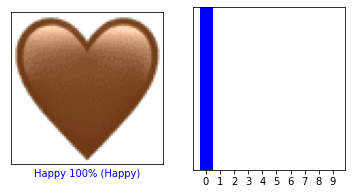

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

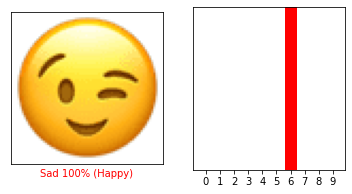

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

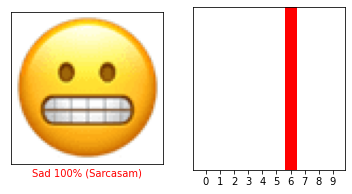

In [ ]:
i = 45
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

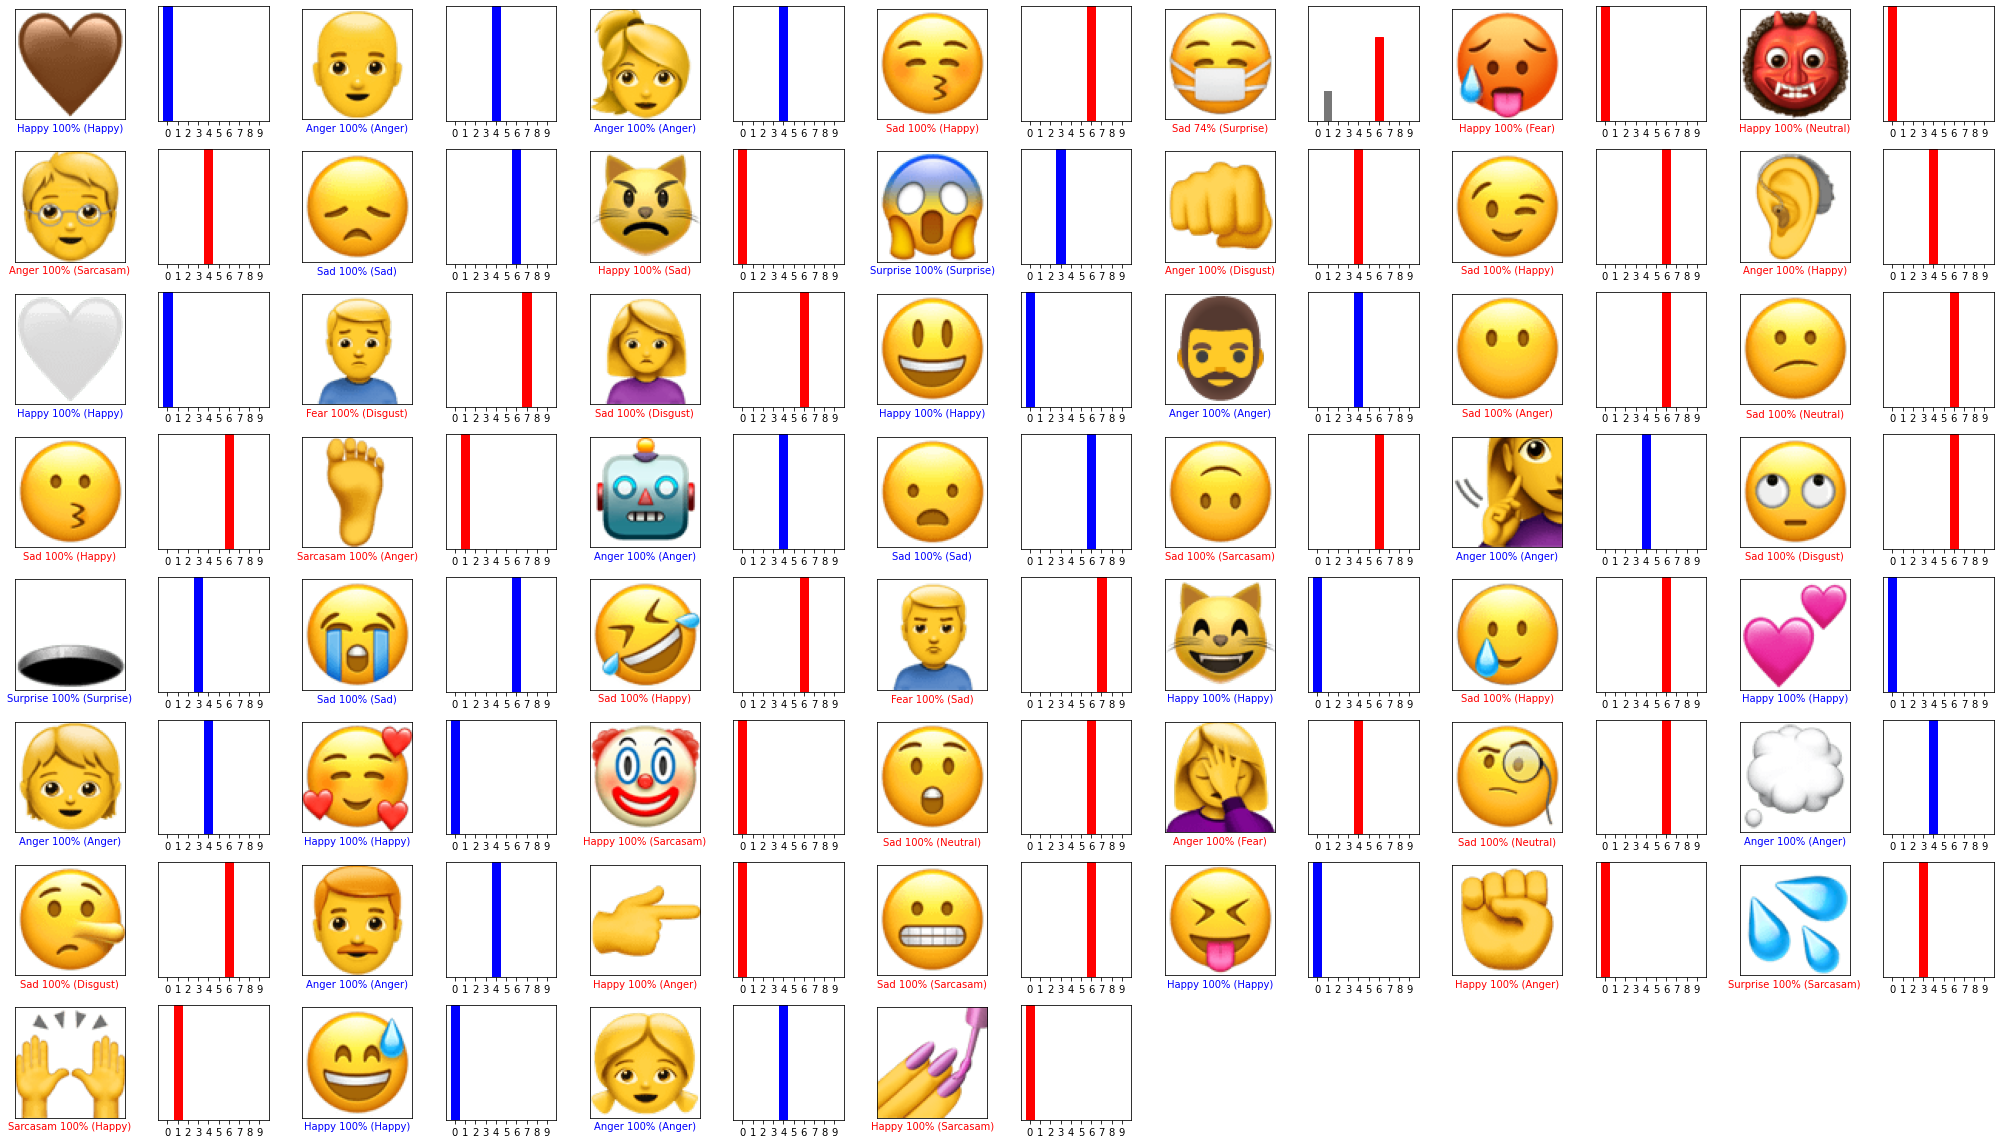

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 7
num_images = 53
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()